In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from api_keys_copy import yelp_api_key
import pprint
from bs4 import BeautifulSoup

In [13]:
api_key = yelp_api_key
headers = {'Authorization': f'Bearer {api_key}',}
url = 'https://api.yelp.com/v3/businesses/search'
params = {
    'term':"restaurants",
    'location': 'Toronto',
    'limit': 50, 
}

all_businesses = []

offset = 0
while offset < 1000:
    params['offset'] = offset
    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    # Check if the request was successful
    if response.status_code == 200:
        businesses = data['businesses']
        if not businesses:
            break  # No more businesses, exit the loop
        all_businesses.extend(businesses)
        offset += 50
    else:
        print(f"Error: {data['error']['code']} - {data['error']['description']}")
        break

print (len(all_businesses))
# Print the names of all businesses
for business in all_businesses:
    print(business['name'])
    for category in business['categories']:
        print(business['categories'])


1000
Pai Northern Thai Kitchen
[{'alias': 'thai', 'title': 'Thai'}]
Mira
[{'alias': 'peruvian', 'title': 'Peruvian'}]
Richmond Station
[{'alias': 'newcanadian', 'title': 'Canadian (New)'}]
Katsuya
[{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}]
[{'alias': 'japanese', 'title': 'Japanese'}, {'alias': 'asianfusion', 'title': 'Asian Fusion'}]
Rasa
[{'alias': 'newcanadian', 'title': 'Canadian (New)'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]
[{'alias': 'newcanadian', 'title': 'Canadian (New)'}, {'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'}]
Gusto 101
[{'alias': 'italian', 'title': 'Italian'}]
Aloette
[{'alias': 'french', 'title': 'French'}, {'alias': 'bistros', 'title': 'Bistros'}, {'alias': 'diners', 'title': 'Diners'}]
[{'alias': 'french', 'title': 'French'}, {'alias': 'bistros', 'title': 'Bistros'}, {'alias': 'diners', 'title': 'Diners'}]
[{'alias': 'french', 'title': 'French'}, {'alias': 'bistros', 'title'

In [15]:
business_data = []
for business in all_businesses:
    name = business['name']
    categories = [category['alias'] for category in business['categories']]
    business_data.append({'Name': name, 'Categories': categories})

df = pd.DataFrame(business_data)
print(df)

                              Name                               Categories
0        Pai Northern Thai Kitchen                                   [thai]
1                             Mira                               [peruvian]
2                 Richmond Station                            [newcanadian]
3                          Katsuya                  [japanese, asianfusion]
4                             Rasa           [newcanadian, tapasmallplates]
..                             ...                                      ...
995                  'ONO Poké Bar                  [hawaiian, sushi, poke]
996                       La Vinia                         [spanish, tapas]
997                     Sukho Thai                                   [thai]
998  Silk Road Lounge & Restaurant  [asianfusion, mideastern, cocktailbars]
999                           BOWL                            [sushi, poke]

[1000 rows x 2 columns]


In [69]:
category_counts = df['Categories'].explode().value_counts().reset_index()

# Rename the columns
category_counts.columns = ['Category', 'Count']

# Sort the categories by count in descending order
category_counts = category_counts.sort_values('Count', ascending=False)

# Get the top 10 categories
top_10_categories = category_counts.head(10)

# Calculate the count for the 11th category
other_count = category_counts['Count'][10:].sum()

# Create a new row for "Other" category
other_category = pd.DataFrame({'Category': ['Other'], 'Count': [other_count]})

# Append the "Other" category row to the top 10 categories
top_10_categories = top_10_categories.append(other_category, ignore_index=True)

print(top_10_categories)



            Category  Count
0            italian     92
1           japanese     80
2       cocktailbars     74
3   breakfast_brunch     72
4        newcanadian     71
5              pizza     61
6               bars     55
7            mexican     55
8         sandwiches     51
9             korean     48
10             Other   1228


/var/folders/fs/0rc1m4zj2yx3w0mhpgq1kbwm0000gn/T/ipykernel_74308/1619066480.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_categories = top_10_categories.append(other_category, ignore_index=True)


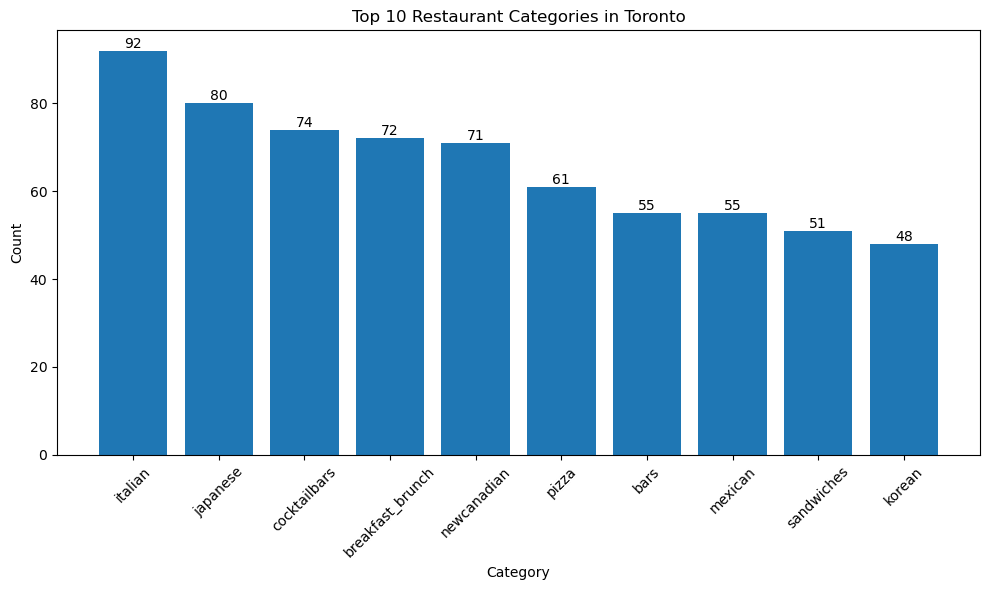

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_categories['Category'], top_10_categories['Count'])

# Add value labels on each bar
for i, count in enumerate(top_10_categories['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Restaurant Categories in Toronto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


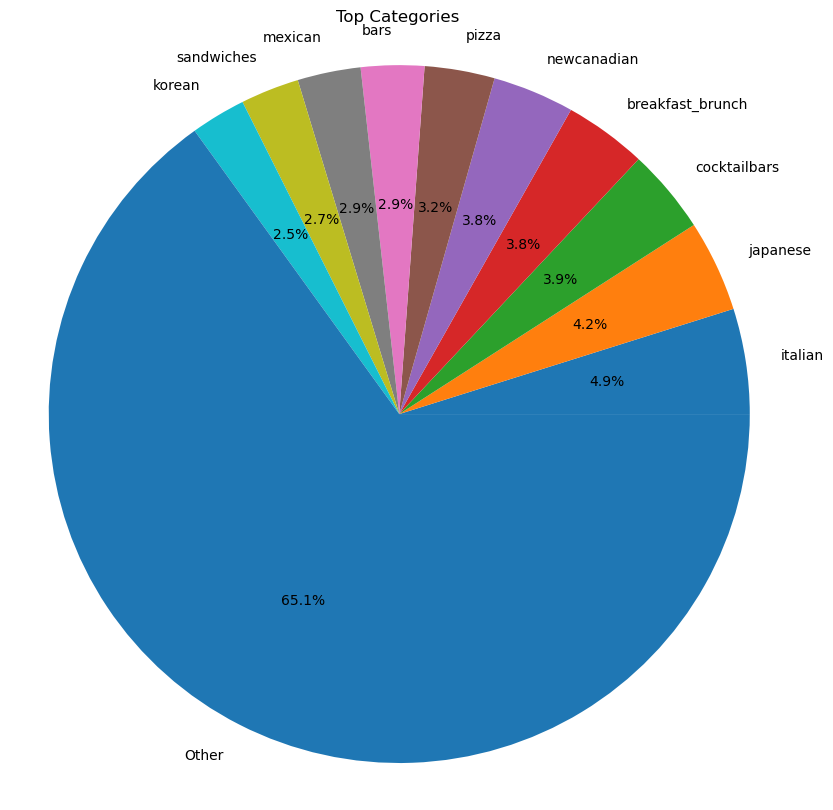

In [72]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_categories['Count'], labels=top_10_categories['Category'], autopct='%1.1f%%')
plt.title('Top Categories')
plt.axis('equal')

# Display the pie chart
plt.show()
